# Algerian Forest Fires Dataset

## 1. UNDERSTANDING THE GIVEN TASK
* Task Given by instructor Krish Naik
*Solve in ipynb:
*Import the dataset. https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#
*Do proper EDA(analysis) of your dataset and create a report
*Then perform necessary preprocessing steps

## 2. DATA COLLECTION AND UNDERSTANDING
I used a dataset on Algerian Forest Fires from UCI. The dataset contains a culmination of forest fire observations and data in two regions of Algeria: the Bejaia region and the Sidi Bel-Abbes region. The timeline of this dataset is from June 2012 to September 2012. In this project, we focused on whether certain weather features could predict forest fires in these regions using few Classification algorithms."""
As per the Task given i choose regression problem to predict fire weather index



### Attribute Information:

* Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations

* Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42

* RH : Relative Humidity in %: 21 to 90

* Ws :Wind speed in km/h: 6 to 29

* Rain: total day in mm: 0 to 16.8 FWI Components

* Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5

* Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

* Drought Code (DC) index from the FWI system: 7 to 220.4

* Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

* Buildup Index (BUI) index from the FWI system: 1.1 to 68

* Fire Weather Index (FWI) Index: 0 to 31.1

* Classes: two classes, namely Fire and not Fire

## 3. DATA EXPLORATION
In this step, we will apply Exploratory Data Analysis (EDA) to extract insights from the data set to know which features have contributed more in predicting Forest fire by performing Data Analysis using Pandas and Data visualization using Matplotlib & Seaborn. It is always a good practice to understand the data first and try to gather as many insights from it.
Below are tasks to be performed in EDA:

* Importing Libraries

* Data Cleaning for EDA Report

* Exploratory Data Analysis (EDA) on all Features

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading csv file
df =pd.read_csv("C:/Users/himan/Downloads/Algerian_forest_fires_dataset_UPDATE.csv",header=1)

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.shape

(246, 14)

# Data Cleaning.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [6]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [7]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [8]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [9]:
# we have two region data set concated, need to get some representaion
# fixing Data mismatching
# reset index
# removing null values by droping 

df.loc[:122,"Region"]=1 # Bejaia Region
df.loc[122:,"Region"]=2 # Sidi Bel- ABBES Region

df[["Region"]]=df[["Region"]].astype(int)

In our data we  have two region data 
* The Bejaia region and the Sidi Bel-Abbes region.


In [10]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [11]:
df[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [12]:
data = df.dropna().reset_index(drop=True)

In [13]:

df[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [14]:
data.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


In [15]:
data = data.drop(122).reset_index(drop=True)

In [16]:
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
239,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
240,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4    RH          243 non-null    object
 5    Ws          243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.7+ KB


In [18]:
# DATA TYPE NEEED TO CORRECTED

data[["day","month","year","Temperature"," RH"," Ws","Region"]] = data[["day","month","year","Temperature"," RH"," Ws","Region"]].astype(int)

obj = [features for features in data.columns if df[features].dtype=="O"]
for i in obj:
    if i!="Classes ":
        df[i]=df[i].astype(float)

In [19]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [20]:
data[['Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI' ]] = data[['Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4    RH          243 non-null    int32  
 5    Ws          243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [22]:
data.columns = data.columns.str.strip()

In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


#### Statistics describtion of data.
 * maximum temp recorded is 42 degree celsius and min is 22.
 
 

In [24]:
data.Classes.value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

* Here it clear we have string mismatched

In [25]:
data.Classes = data.Classes.str.strip()

In [26]:
data.Classes.value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

 ## NOW OUR DATA IS CLEANED, LETS MOVE TO NEXT STEP

In [28]:
data.to_csv("Algerian Forest Fires Dataset cleaned.csv",index=False) # Saving data


In [29]:
# NEXT STEP OF EDA --ANALYSING DATA.


In [34]:
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [37]:
df1 = data.copy()

In [46]:
#encoding for 'fire' and 'not fire'
df1["Classes"] = np.where(df1["Classes"]=="not fire",0,1)

In [47]:
df1

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,2
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,2
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,2
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,2


In [53]:
data1 = df1.drop(["day","month","year"],axis=1)

In [54]:
data1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


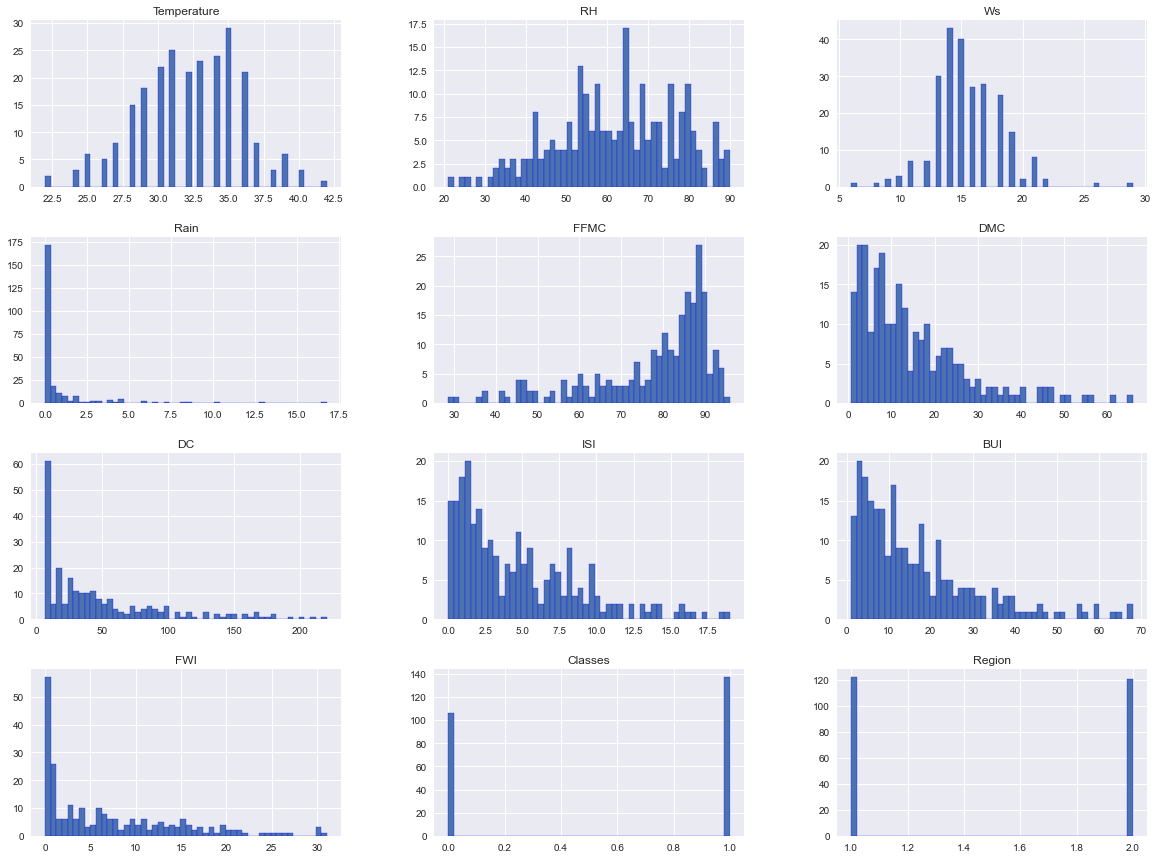

In [56]:
plt.style.use("seaborn")
data1.hist(bins=50,figsize=(20,15),ec="b")
plt.show()

<AxesSubplot:>

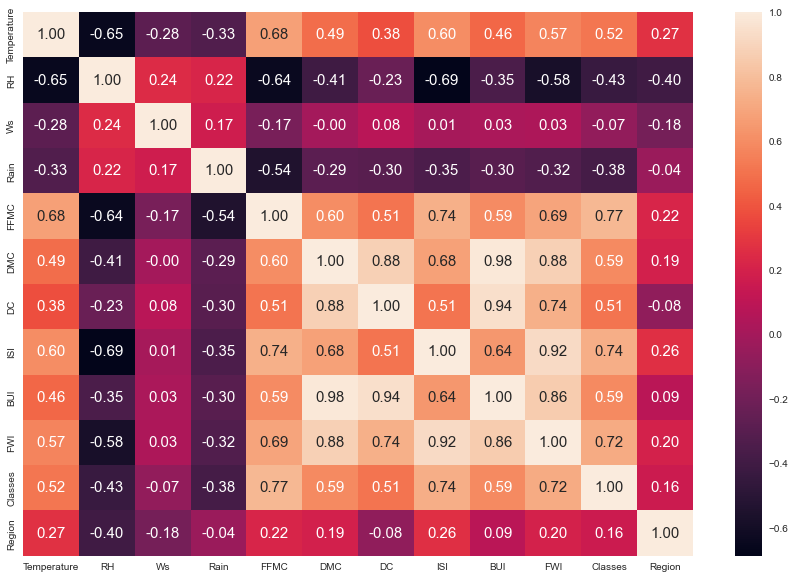

In [57]:
plt.figure(figsize=(15,10))
sns.heatmap(data1.corr(),annot=True,fmt="0.2f",annot_kws={'size': 15})

In [58]:
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


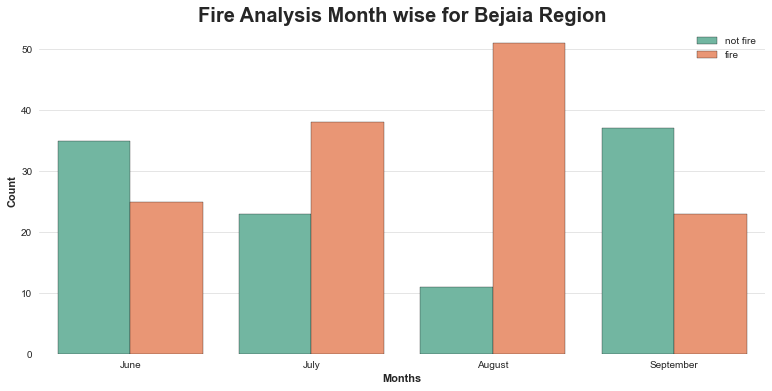

In [71]:
df = data.loc[data["Region"]==0]
plt.subplots(figsize=(13,6))
sns.set_style("whitegrid")
sns.countplot(x="month",hue="Classes",data=data,ec="black",palette="Set2")
plt.title('Fire Analysis Month wise for Bejaia Region', fontsize=20, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.legend(loc="upper right")
plt.show()

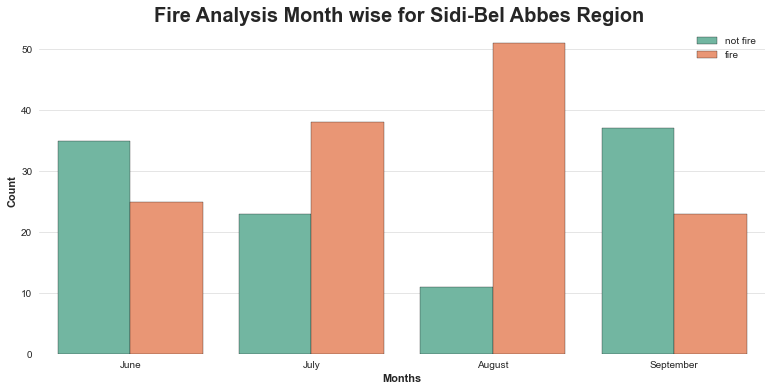

In [72]:
df = data.loc[data["Region"]==1]
plt.subplots(figsize=(13,6))
sns.set_style("whitegrid")
sns.countplot(x="month",hue="Classes",data=data,ec="black",palette="Set2")
plt.title('Fire Analysis Month wise for Sidi-Bel Abbes Region ', fontsize=20, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.legend(loc="upper right")
plt.show()

* most of the times the forest get on fire only in the month June,July,Aug,Sep.
* In August, the highest number of times forest caught on fire for both the Regions.Least in the month of Sep.

In [126]:
data1.groupby(["Temperature"],as_index=False)["Classes"].sum()

,Temperature,Classes
0,22,0
1,24,0
2,25,0
3,26,1
4,27,1
5,28,3
6,29,5
7,30,7
8,31,16
9,32,12


In [102]:
#sns.set_theme(style="whitegrid")
#plt.figure(figsize=[14,8])
data_fire_no_fire



,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
Classes,,,,,,,,,,,,,,
fire,2375,1031,275644,4630,7729,2099,13.2,11992.3,2884.1,9701.9,1017.0,3290.4,1607.4,215
not fire,1455,792,213272,3183,7347,1666,172.2,6923.4,683.3,2309.8,135.4,765.4,102.2,149


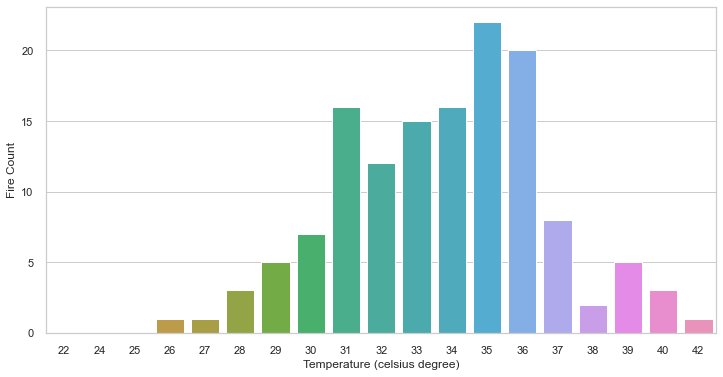

In [158]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=[12,6])
feature_by = data1.groupby(["Temperature"],as_index=False)["Classes"].sum()
ax = sns.barplot(x="Temperature",y="Classes",data=feature_by[['Temperature',"Classes"]],estimator=sum)
ax.set(xlabel="Temperature (celsius degree)", ylabel='Fire Count')
plt.show()


## Insights: 
* most of the time max fire counts are when temp reaches at 35 and 36 degree.
* Although temp incresess but fire counts are less.
* Temperature between 31 to 36 has more probability of catching a fire.


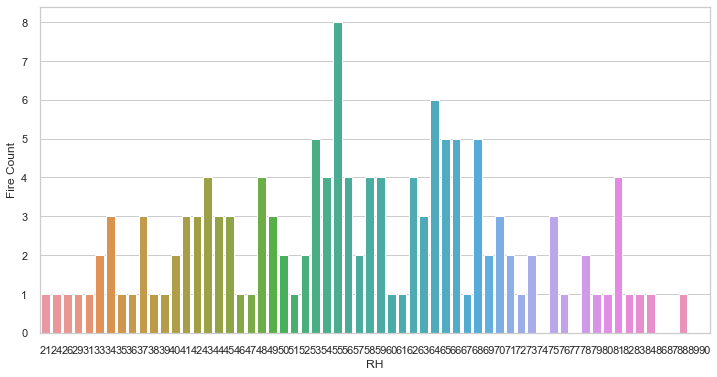

In [160]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=[12,6])
feature_by = data1.groupby(["RH"],as_index=False)["Classes"].sum()
ax = sns.barplot(x="RH",y="Classes",data=feature_by[['RH',"Classes"]],estimator=sum)
ax.set(xlabel="Relative Humidity %", ylabel='Fire Count')
plt.show()


## Insights
* RELATIVE HUMIDITY between 50 - 80% have high fire counts.

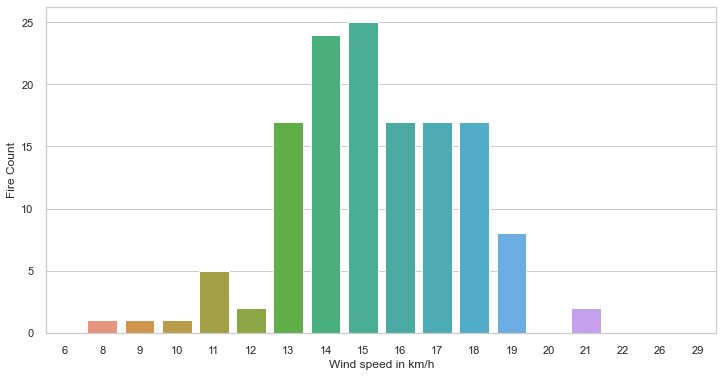

In [162]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=[12,6])
feature_by = data1.groupby(["Ws"],as_index=False)["Classes"].sum()
ax = sns.barplot(x="Ws",y="Classes",data=feature_by[['Ws',"Classes"]],estimator=sum)
ax.set(xlabel="Wind speed in km/h", ylabel='Fire Count')
plt.show()

## Insights
* Wind speed of 13-18 has greater chances of putting a fire and  spreading it.

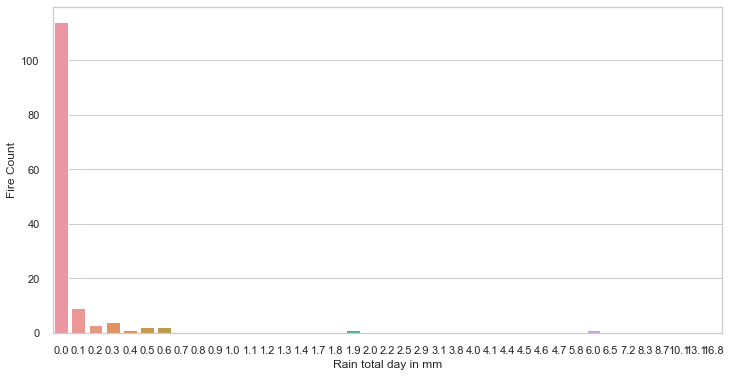

In [190]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=[12,6])
feature_by = data1.groupby(["Rain"],as_index=False)["Classes"].sum()
ax = sns.barplot(x="Rain",y="Classes",data=feature_by[['Rain',"Classes"]],estimator=sum)
ax.set(xlabel="Rain total day in mm", ylabel='Fire Count')
plt.show()


 ## Insights
 * highest fire caughts happens when there is no rain of less then 0.4 mm in a day.

Text(0.5, 1.0, 'Boxplot of Given Dataset')

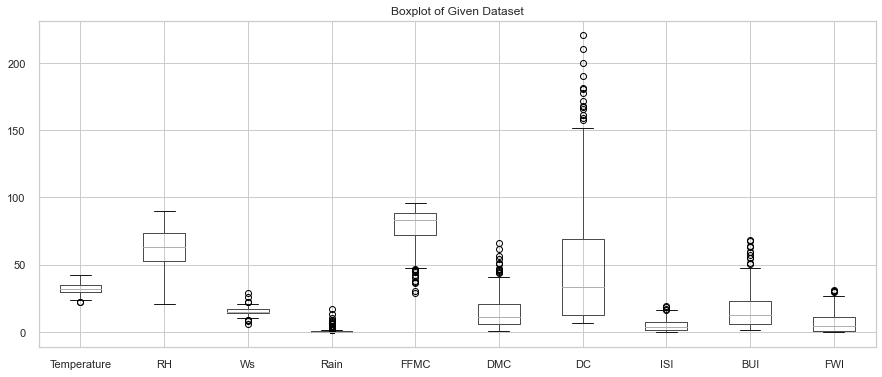

In [174]:
dbp = data1.drop(["Classes","Region"],axis=1)
fig = plt.figure(figsize=(15,6))
ax = dbp.boxplot()
ax.set_title("Boxplot of Given Dataset")

In [176]:
df_fill = data1.drop(['Region','Temperature','Rain','Ws','RH'],axis=1)

In [178]:
df_fill.head()

,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,64.4,4.1,7.6,1.0,3.9,0.4,0
2,47.1,2.5,7.1,0.3,2.7,0.1,0
3,28.6,1.3,6.9,0.0,1.7,0.0,0
4,64.8,3.0,14.2,1.2,3.9,0.5,0


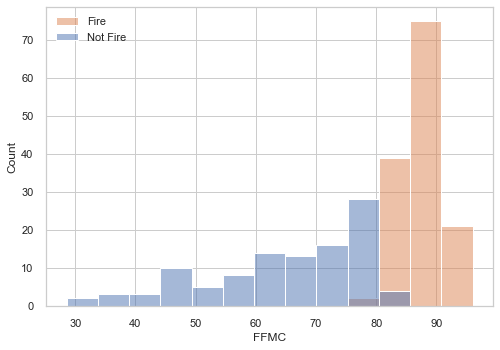

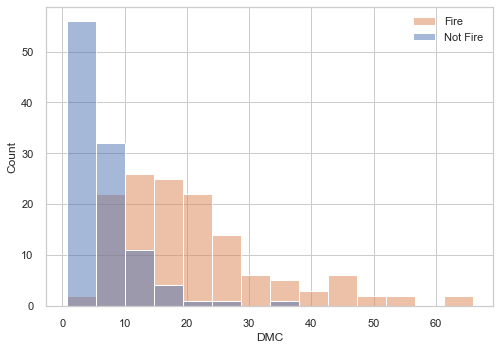

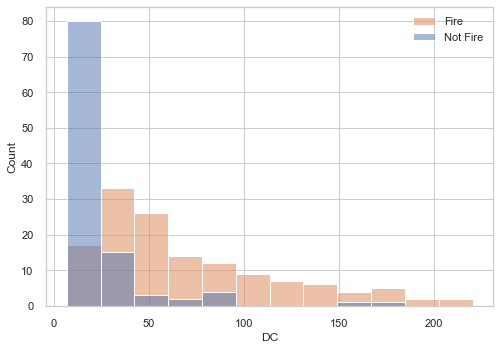

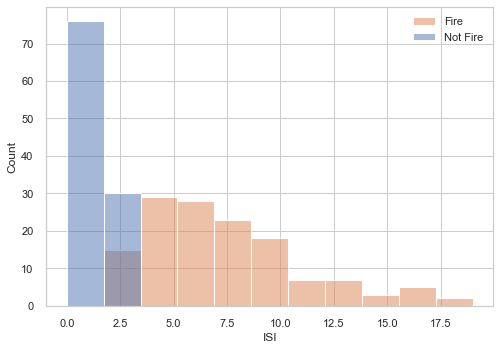

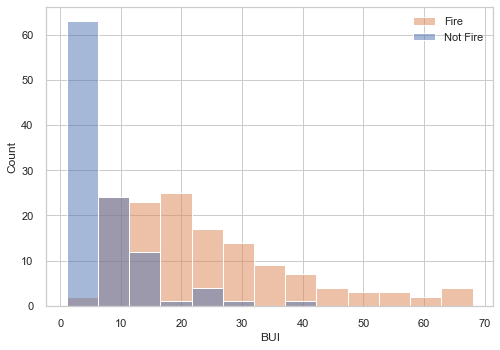

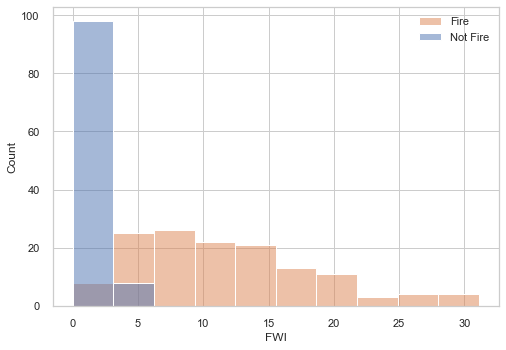

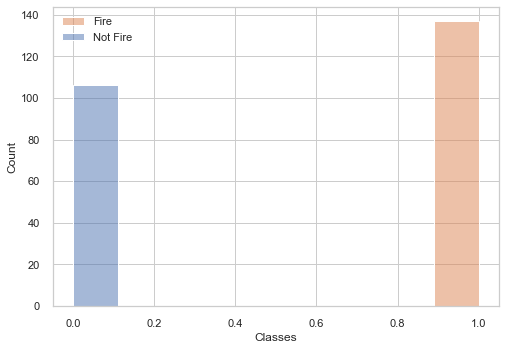

In [187]:
df_fill = data1.drop(['Region','Temperature','Rain','Ws','RH'],axis=1)
for features in df_fill:
    sns.histplot(data=df_fill,x=features,hue="Classes")
    plt.legend(labels=["Fire","Not Fire"])
    plt.show()
     

### FWI System Components Report
#### FWI Report (Canadian Forest Fire Weather Index)

* FMMC-(Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5)--- Increase of FMMC results risk of catching       fire as highest fire counts is in 80 and 90.
* Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 --DUFF in 10-40 have higher chances of forest fire while low     when is 1-10.
* Drought Code (DC) index which ranges between 7 to 220.4--- here 0-25 is safe and has lower chance of Forest fires whereas       range   above 25 DC has higher chance of forest fires.
* Initial Spread Index (ISI) index from the FWI system: 0 to 18.5---ISI between (4-10) have counts of fire,lowest when it is       between 0-2 and 15.0.
* Buildup Index (BUI) index from the FWI system: 1.1 to 68---BUI has higher chance of fire when it is  10 to 40, But  BUI         reaches around 50-60 it have low chance.
* Fire Weather Index (FWI) Index which ranges between 1 to 31.1--- here 0-3 has lower chance of Forest fires and 3-25 FWI has       higher chance of forest fires.

